In [27]:
import pandas as pd
import seaborn as sns
import pickle
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('ai4i2020.csv')

In [5]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [6]:
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [8]:
profile=ProfileReport(df, title="My Data Profile Report")

In [9]:
profile

In [10]:
profile.to_widgets()

In [12]:
html_data=profile.to_html()
html_data

'<!doctype html><html lang=en><head><meta charset=utf-8><meta name=viewport content="width=device-width, initial-scale=1, shrink-to-fit=no"><meta name=description content="Profile report generated with the `pandas-profiling` Python package"><meta name=author content="Simon Brugman and the open source community."><meta name=generator content="Pandas Profiling v3.0.0"><meta name=url content=https://github.com/pandas-profiling/pandas-profiling><meta name=date content="2021-08-22 11:45:49.810028"><title>My Data Profile Report</title><style>\n/*!\n * Bootstrap v3.3.7 (http://getbootstrap.com)\n * Copyright 2011-2016 Twitter, Inc.\n * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)\n *//*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,hgroup,main,menu,nav,section,summary{display:block}audio

In [13]:
profile.to_file("MY_AI4I 2020 _report.html")

In [14]:
df.shape # shape of the file

(10000, 14)

In [19]:
# dropna in data file
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

<AxesSubplot:xlabel='Air temperature [K]'>

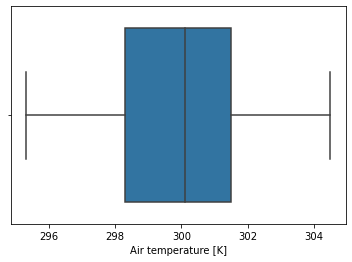

In [21]:
sns.boxplot(x=df['Air temperature [K]'])

In [26]:
# any duplicate data
df.duplicated().sum()

0

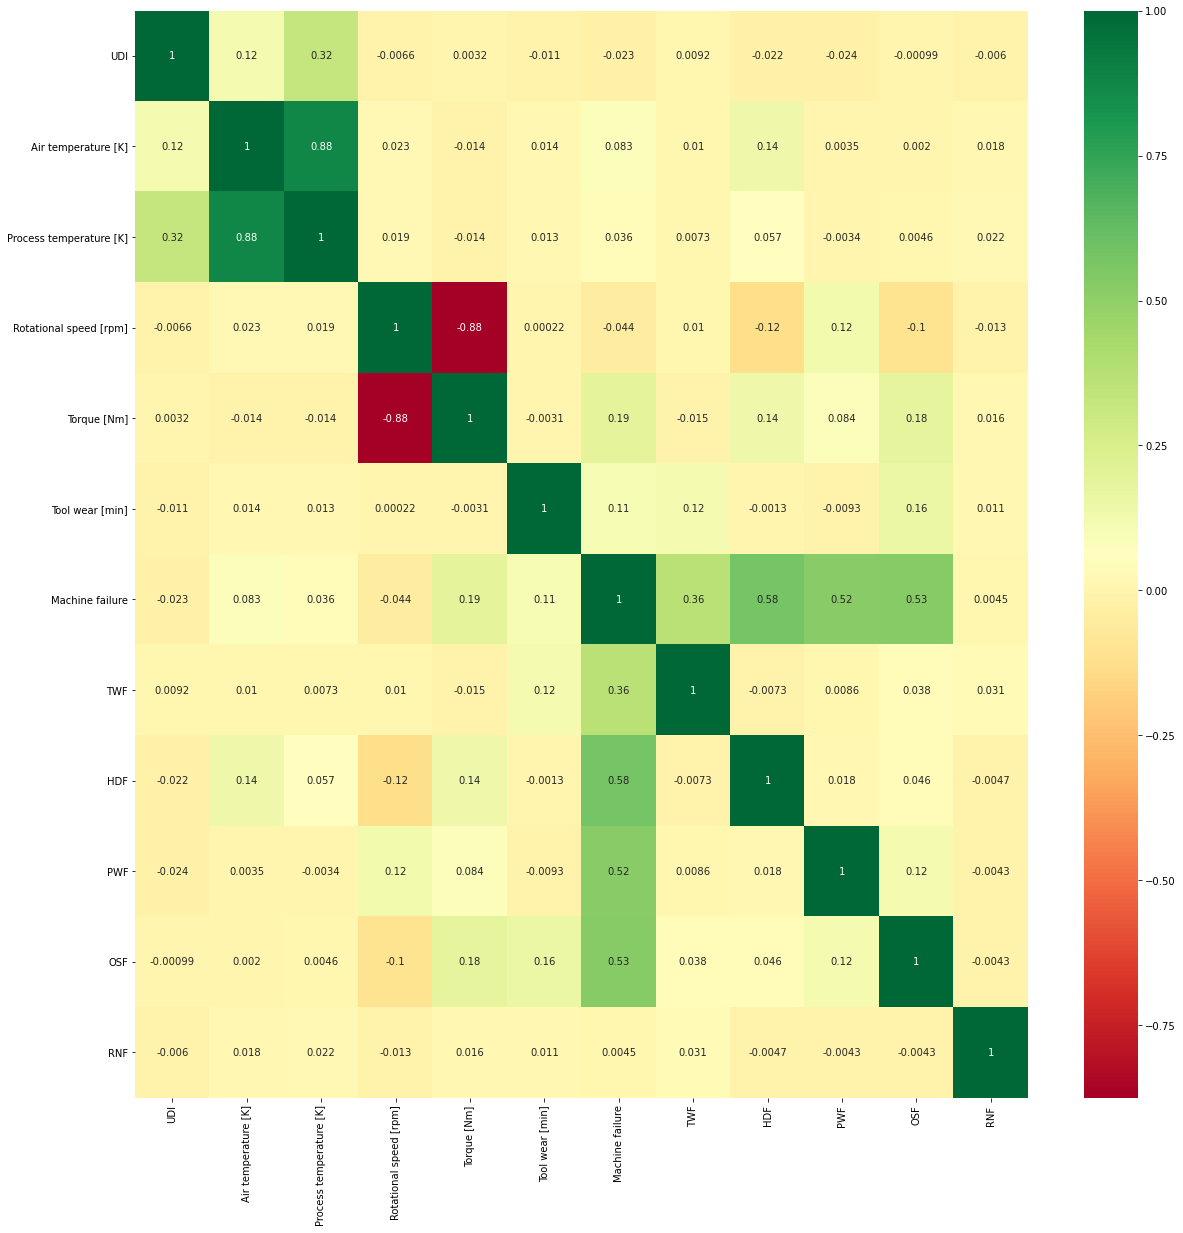

In [29]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [46]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [69]:
y=df[['Process temperature [K]']]
x=df[['Torque [Nm]']]

In [70]:
model.fit(x,y)

LinearRegression()

In [71]:
model.predict([[300]])

array([[309.46142473]])

In [72]:
file='linear_reg.sav'

In [73]:
pickle.dump(model, open(file, 'wb')) # save the file in pickle

In [74]:
saved_model=pickle.load(open(file, 'rb'))

In [75]:
saved_model.predict([[300]])

array([[309.46142473]])

In [76]:
model.score(x,y)

0.00019770084122272547